<a href="https://colab.research.google.com/github/mauricionoris/ae/blob/master/pratica/ae_atv_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import random
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Exemplo de Função de Fitness
# (maximizar f(x) = x * sin(x), no intervalo [0,10])
# ============================================================
def fitness_function(x):
    return x * np.sin(x)

# Gera população inicial
def gerar_populacao(tamanho, limites):
    return [random.uniform(*limites) for _ in range(tamanho)]

# Avalia população
def avaliar_populacao(populacao):
    return [fitness_function(ind) for ind in populacao]

# ============================================================
# Métodos de Seleção
# ============================================================

# 1️⃣ Seleção por Ranking
def selecao_ranking(populacao, fitness, num_pais):
    ordenados = sorted(list(zip(populacao, fitness)), key=lambda x: x[1])
    ranks = np.arange(1, len(populacao) + 1)
    probs = ranks / ranks.sum()
    escolhidos = np.random.choice([p for p, _ in ordenados], size=num_pais, p=probs)
    return list(escolhidos)

# 2️⃣ Seleção por Elitismo
def selecao_elitismo(populacao, fitness, num_pais):
    elite_idx = np.argsort(fitness)[-num_pais:]
    return [populacao[i] for i in elite_idx]

# 3️⃣ Seleção Estocástica Universal (SUS)
def selecao_sus(populacao, fitness, num_pais):
    soma_fit = sum(fitness)
    probs = [f / soma_fit for f in fitness]
    cumsum = np.cumsum(probs)
    start = random.uniform(0, 1/num_pais)
    pontos = [start + i/num_pais for i in range(num_pais)]
    pais = []
    i = 0
    for p in pontos:
        while p > cumsum[i]:
            i += 1
        pais.append(populacao[i])
    return pais

# 4️⃣ Seleção por Bolsa de Sobrevivência (Steady-State)
def selecao_steady_state(populacao, fitness, num_substituicoes):
    descendentes = gerar_populacao(num_substituicoes, (0, 10))
    fit_desc = avaliar_populacao(descendentes)
    # Substitui piores indivíduos
    pior_idx = np.argsort(fitness)[:num_substituicoes]
    for i, idx in enumerate(pior_idx):
        populacao[idx] = descendentes[i]
        fitness[idx] = fit_desc[i]
    return populacao

# 5️⃣ Seleção por Torneio Estocástico
def selecao_torneio_estocastico(populacao, fitness, num_pais, prob=0.8):
    pais = []
    for _ in range(num_pais):
        i1, i2 = random.sample(range(len(populacao)), 2)
        if random.random() < prob:
            vencedor = populacao[i1] if fitness[i1] > fitness[i2] else populacao[i2]
        else:
            vencedor = populacao[i2] if fitness[i1] > fitness[i2] else populacao[i1]
        pais.append(vencedor)
    return pais

# 6️⃣ Seleção por Idade (Age-Based)
def selecao_por_idade(populacao, idades, fitness, max_idade, num_pais):
    sobreviventes = [p for p, idade in zip(populacao, idades) if idade < max_idade]
    if len(sobreviventes) < num_pais:
        sobreviventes += gerar_populacao(num_pais - len(sobreviventes), (0, 10))
    return random.sample(sobreviventes, num_pais)

# ============================================================
# Operadores Genéticos Simples
# ============================================================
def cruzamento(p1, p2):
    alpha = random.random()
    return alpha * p1 + (1 - alpha) * p2

def mutacao(ind, taxa=0.1, limites=(0,10)):
    if random.random() < taxa:
        ind += np.random.normal(0, 0.5)
        ind = np.clip(ind, *limites)
    return ind

# ============================================================
# Função Principal do AG
# ============================================================
def algoritmo_genetico(selecao, geracoes=50, tamanho_pop=20, limites=(0,10)):
    populacao = gerar_populacao(tamanho_pop, limites)
    idades = [0]*tamanho_pop
    historico = []

    for g in range(geracoes):
        fitness = avaliar_populacao(populacao)
        melhor = max(fitness)
        historico.append(melhor)

        # Seleção
        if selecao == "ranking":
            pais = selecao_ranking(populacao, fitness, tamanho_pop)
        elif selecao == "elitismo":
            pais = selecao_elitismo(populacao, fitness, tamanho_pop)
        elif selecao == "sus":
            pais = selecao_sus(populacao, fitness, tamanho_pop)
        elif selecao == "steady":
            populacao = selecao_steady_state(populacao, fitness, 2)
            continue
        elif selecao == "torneio_est":
            pais = selecao_torneio_estocastico(populacao, fitness, tamanho_pop)
        elif selecao == "idade":
            pais = selecao_por_idade(populacao, idades, fitness, max_idade=10, num_pais=tamanho_pop)
            idades = [i+1 for i in idades]
        else:
            raise ValueError("Método de seleção inválido.")

        # Cruzamento e mutação
        nova_pop = []
        for i in range(0, tamanho_pop, 2):
            p1, p2 = pais[i], pais[i+1]
            filho1 = mutacao(cruzamento(p1, p2))
            filho2 = mutacao(cruzamento(p2, p1))
            nova_pop += [filho1, filho2]
        populacao = nova_pop

    return historico




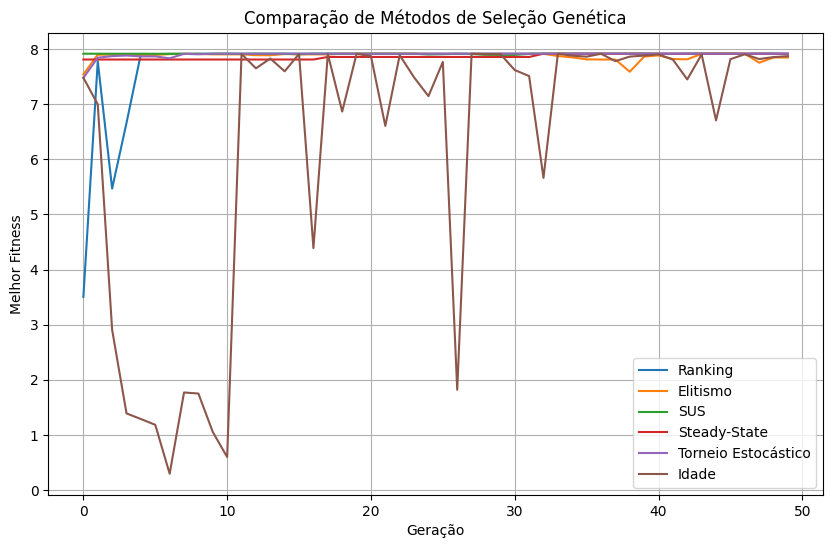

In [2]:
# ============================================================
# Execução e Visualização
# ============================================================

metodos = {
    "Ranking": "ranking",
    "Elitismo": "elitismo",
    "SUS": "sus",
    "Steady-State": "steady",
    "Torneio Estocástico": "torneio_est",
    "Idade": "idade"
}

plt.figure(figsize=(10,6))
for nome, cod in metodos.items():
    historico = algoritmo_genetico(cod)
    plt.plot(historico, label=nome)

plt.title("Comparação de Métodos de Seleção Genética")
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.legend()
plt.grid(True)
plt.show()

| Método                  | Ideia central                                           | Vantagem principal           |
| ----------------------- | ------------------------------------------------------- | ---------------------------- |
| **Ranking**             | Probabilidade baseada na posição, não no valor absoluto | Evita dominância precoce     |
| **Elitismo**            | Mantém os melhores indivíduos                           | Garante progresso contínuo   |
| **SUS**                 | Amostragem uniforme tipo roleta                         | Reduz variância              |
| **Steady-State**        | Substitui poucos indivíduos por vez                     | Mantém diversidade           |
| **Torneio Estocástico** | Probabilidade de escolha não determinística             | Reduz convergência prematura |
| **Idade**               | Indivíduos morrem com o tempo                           | Aumenta diversidade          |


# Exercícios – Métodos de Seleção Genética

###OBS: Alguns exercícios são mais complexos. Façam o que conseguir! Desafiem-se !

### **1. Execução Básica dos Métodos**

Execute o código fornecido e observe o gráfico comparativo de desempenho dos seis métodos de seleção genética.
**Pergunta:** Qual método apresentou a maior velocidade de convergência? Qual apresentou maior estabilidade?
Justifique com base no gráfico.

---

### **2. Comparação de Diversidade**

Modifique o código para armazenar, a cada geração, a **variância dos valores de fitness** da população.
**Tarefa:** Plote a variância ao longo das gerações para cada método de seleção.
**Pergunta:** Quais métodos preservam mais diversidade genética ao longo do tempo?

---

### **3. Variação do Tamanho da População**

Execute o algoritmo com populações de tamanhos 10, 50 e 100.
**Pergunta:** Como o tamanho da população influencia o desempenho de cada método?
**Desafio:** Explique por que o método SUS pode apresentar desempenho mais estável com populações pequenas.

---

### **4. Alteração da Função de Fitness**

Troque a função de fitness por:

```python
def fitness_function(x):
    return -(x - 5)**2 + 25
```

**Pergunta:** O comportamento dos métodos muda quando o problema é unimodal (com um ótimo global claro)?
**Explique** qual método se torna mais eficiente nesse tipo de problema.

---

### **5. Adição de Ruído (Ambiente com Incerteza)**

Adicione ruído à função de fitness:

```python
def fitness_function(x):
    return x * np.sin(x) + np.random.normal(0, 0.5)
```

**Pergunta:** Quais métodos são mais robustos a ruídos no cálculo do fitness?
Analise o desempenho do Torneio Estocástico neste contexto.

---

### **6. Introdução de Elitismo Parcial**

Adapte o algoritmo para incluir **elitismo de 10%** da população em todos os métodos.
**Tarefa:** Gere gráficos comparando o desempenho “com” e “sem” elitismo.
**Pergunta:** Quais métodos mais se beneficiam dessa estratégia?

---

### **7. Teste com Problema Multimodal**

Troque a função de fitness para:

```python
def fitness_function(x):
    return np.sin(5*x) * (1 - np.tanh(x**2 / 25))
```

**Pergunta:** Quais métodos lidam melhor com múltiplos ótimos locais?
**Explique:** Por que métodos estocásticos (como Torneio Estocástico e SUS) tendem a se sair melhor?

---

### **8. Comparação Visual com Curvas Suavizadas**

Gere gráficos suavizados (usando média móvel) para os históricos de fitness de cada método.
**Pergunta:** Quais métodos apresentam curvas mais suaves (menor flutuação)?
**Discussão:** Relacione isso à variância da seleção e ao equilíbrio entre exploração e intensificação.

---

### **9. Tempo de Execução**

Meça o tempo de execução médio de cada método ao longo de 30 execuções.
**Pergunta:** Há diferença significativa no custo computacional entre os métodos?
**Discussão:** Qual método apresenta melhor custo-benefício entre desempenho e tempo?

---

### **10. Caso Especial – Método “Age-Based” em Destaque**

Modifique o código para usar uma função de fitness **dinâmica**, que muda com o tempo:

```python
def fitness_function(x, t):
    return x * np.sin(x + 0.1*t)
```

E altere a função principal para passar a geração `t` como argumento.

**Tarefa:** Compare o desempenho dos métodos em um ambiente que muda a cada geração.
**Pergunta:** O método **Age-Based Selection** tende a ter melhor desempenho nesse cenário.
**Analise:**

* Por que ele supera os demais?
* Qual a importância de manter indivíduos novos quando o ambiente muda?
* Que implicações isso tem para algoritmos adaptativos no mundo real?

---

## Bonus
Criem um  **novo método híbrido**, combinando ideias e pensando no tema do seu projeto:

* **Ranking + Elitismo**,
* **SUS + Age-Based**,
* **Steady-State + Torneio Estocástico**,

E compare seus resultados com os métodos originais.

